### This is a *brief* summary of what the assignment consisted of:

#### Question 1: Implement a sampling algorithm to simulate a multinomial distribution of a students daily routine
#### Question 2: Fit a 20-degree polynomial to a given dataset and add L2-Regularization to the model
#### Question 3: Fit a linear regression to another dataset using stochastic gradient descent
#### Question 4: Clean real life dataset, fit using linear regression, calculate MSE. Use Ridge-Regression and try 

# Question 1

In [1]:
import random
import collections
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import itertools 
%matplotlib inline

In [2]:
list1 = []
for i in range(100):
    list1.append(random.randint(1,10))
counter = []
counter = collections.Counter(list1)
dict = {"Movies": counter[1] + counter[2], "COMP-551": counter[3] + counter[4] + counter[5] + counter[6], "Playing": counter[7], "Studying": counter[8] + counter[9] + counter[10]}

In [3]:
list2 = []
for i in range(1000):
    list2.append(random.randint(1,10))
counter=collections.Counter(list2)
dict2 = {"Movies": counter[1] + counter[2], "COMP-551": counter[3] + counter[4] + counter[5] + counter[6], "Playing": counter[7], "Studying": counter[8] + counter[9] + counter[10]}

In [4]:
print(dict)
dict2

{'Movies': 25, 'COMP-551': 51, 'Playing': 8, 'Studying': 16}


{'Movies': 173, 'COMP-551': 414, 'Playing': 100, 'Studying': 313}

# Question 2

In [5]:
class Data_set:
    
    def __init__ (self):
        self.x = []
        self.y = []
        self.X = np.zeros(shape=(50, 21))
        self.W = np.zeros(shape=(21,1))
        self.Y = np.zeros(shape=(50,1))
        self.mse = 0
        self.WL2 = np.zeros(shape=(21,1))
        self.YL2 = np.zeros(shape=(50,1))
        self.mseL2 = 0
        
        
    def imp(self, filename):
        read_data = csv.reader(open(filename, 'r'))  
        data = []
        for row in read_data:
            data.append(row)
        for i in range(len(data)):
            self.x.append(float(data[i][0]))
            self.y.append(float(data[i][1]))
    
    def calc_X(self, deg):
        def poly(self, x, deg):
            list3 = []
            for i in range(deg+1):
                list3.append(x ** i)
            return list3
        for i in range(len(self.x)):
            self.X[i] = poly(self, self.x[i], 20)
    
    def calc_W(self):
        self.calc_X(20)
        self.W = np.matmul(inv(np.matmul(self.X.transpose(),self.X)), np.matmul(self.X.transpose(), self.y))
        
    def calc_Y(self, W):
        self.calc_X(20)
        self.Y = np.matmul(self.X, W)
    
    def calc_mse(self):
        for i in range(len(self.y)):
            self.mse += (self.y[i] - self.Y[i]) ** 2
        self.mse /= len(self.y)
        
    def plot(self):
        plt.scatter(self.x, self.y)
        plt_x, plt_Y = zip(*sorted(zip(self.x, self.Y)))
        plt.plot(plt_x, plt_Y)
        plt.ylim(-20, 35)
        
    def calc_WL2(self, a):
        I = np.identity(21)
        self.calc_X(20)
        self.WL2 = np.matmul(inv(np.add(np.matmul(self.X.transpose(), self.X), a*I)), np.matmul(self.X.transpose(), self.y))
    
    def calc_YL2(self, W):
        self.calc_X(20)
        self.YL2 = np.matmul(self.X, W)
    
    def calc_mseL2(self):
        for i in range(len(self.y)):
            self.mseL2 += (self.y[i] - self.YL2[i]) ** 2
        self.mseL2 /= len(self.y)
    

In [6]:
train = Data_set()
train.imp('Datasets/Dataset_1_train.csv')
valid = Data_set()
valid.imp('Datasets/Dataset_1_valid.csv')
test = Data_set()
test.imp('Datasets/Dataset_1_test.csv')

## 2.1

In [7]:
train.calc_W()
train.calc_Y(train.W)
train.calc_mse()
print("Training MSE:", train.mse)

Training MSE: 6.474719046265721


In [8]:
valid.calc_Y(train.W)
valid.calc_mse()
print("Validation MSE:", valid.mse)

Validation MSE: 1414.9701913654246


Text(0, 0.5, 'output')

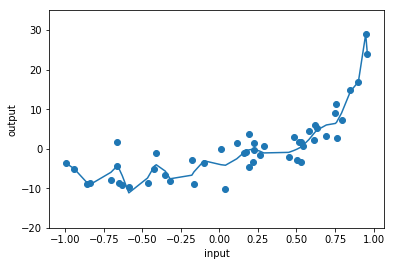

In [9]:
train.plot()
plt.xlabel("input")
plt.ylabel("output")

Text(0, 0.5, 'output')

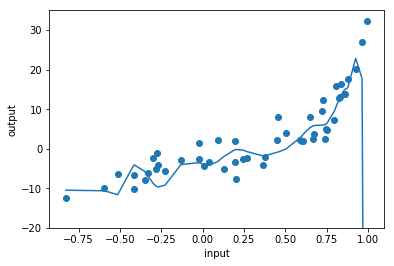

In [10]:
valid.plot()
plt.xlabel("input")
plt.ylabel("output")

Confirmation that the model was overfitting.

## 2.2 

0.03

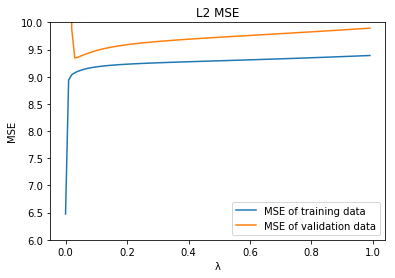

In [11]:
#2.2 (a)
mse_train = []
mse_valid = []
low = 100000
low_a = -1
for a in np.arange(0.0, 1.0, 0.01):
    train.calc_WL2(a)
    train.calc_YL2(train.WL2)
    train.calc_mseL2()
    valid.calc_YL2(train.WL2)
    valid.calc_mseL2()
    mse_train.append(train.mseL2)
    mse_valid.append(valid.mseL2)
    if(valid.mseL2 < low):
        low = valid.mseL2
        low_a = a
t = np.arange(0, 1, 0.01)
plt.title("L2 MSE")
plt.xlabel("λ")
plt.ylabel("MSE")
tr, = plt.plot(t, mse_train, label='MSE of training data')
val, = plt.plot(t, mse_valid, label='MSE of validation data')
plt.legend(handles=[tr, val])
plt.ylim(6,10)

#2.2 (b)
low_a

In [12]:
train.calc_WL2(low_a)
test.calc_YL2(train.WL2)
test.calc_mseL2()
print("Test MSE:", test.mseL2)

Test MSE: 10.675440514573907


Text(0, 0.5, 'output')

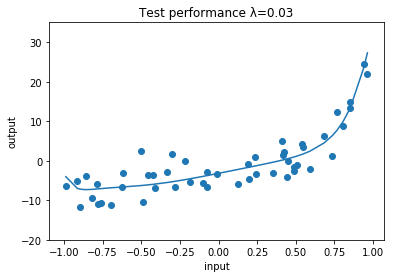

In [13]:
plt.scatter(test.x, test.y)
plt_x, plt_Y = zip(*sorted(zip(test.x, test.YL2)))
plt.plot(plt_x, plt_Y)
plt.ylim(-20, 35)
plt.title("Test performance λ=0.03")
plt.xlabel("input")
plt.ylabel("output")

The model fits well. The degree of the source polynomial is most likely 2.

# Question 3

In [14]:
train2 = Data_set()
train2.imp('Datasets/Dataset_2_train.csv')
valid2 = Data_set()
valid2.imp('Datasets/Dataset_2_valid.csv')
test2 = Data_set()
test2.imp('Datasets/Dataset_2_test.csv')

## 3.1

In [15]:
# 1.(a)

def MSE_valid(a, plot, epochs):
    w0 = 0
    w1 = 0
    temp = 0.001
    MSE = []
    MSE_v = []

    y_hat = np.zeros(shape=(len(train2.y),1))
    y_hat_valid = np.zeros(shape=(len(valid2.y),1))

    for j in range(1, epochs):
        combined = list(zip(train2.x, train2.y, y_hat))
        random.shuffle(combined)
        train2.x[:], train2.y[:], y_hat[:] = zip(*combined)
        mse = 0
        mse_valid = 0
        del combined

        for i in range(len(train2.x)):
            y_hat[i] = w0 + w1*train2.x[i]
            w0 = w0 - a*(y_hat[i] - train2.y[i])
            w1 = w1 - a*(y_hat[i] - train2.y[i])*train2.x[i]
            mse += (train2.y[i] - y_hat[i]) ** 2
            if(i < len(valid2.x)):
                y_hat_valid[i] = w0 + w1*valid2.x[i]
                mse_valid += (valid2.y[i] - y_hat_valid[i]) ** 2
        MSE.append(mse / len(train2.x))
        MSE_v.append(mse_valid / len(valid2.x))
        
        if(plot == 2):
            plt.figure()
            plt.scatter(test2.x, test2.y)
            t = np.arange(0,1.5,0.01)
            plt.plot(t, w0+w1*t)
            plt.xlabel("Input")
            plt.ylabel("Output")
   
    if(plot == 1):
        tr, = plt.plot(MSE, label='MSE of training data')
        val, = plt.plot(MSE_v, label='MSE of validation data')
        plt.legend(handles=[tr, val])
        plt.title("Step size: " + str(a))
        plt.xlabel("Epoch #")
        plt.ylabel("MSE")
        print(mse_valid / len(valid2.x))
        
    return w0, w1

[0.22491763]


(array([3.94597737]), array([3.62534053]))

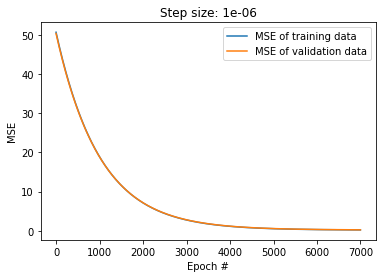

In [16]:
MSE_valid(0.000001, 1, 7000)

## 3.2

[0.08535171]
[0.07464444]
[0.07525571]


(0, 0.2)

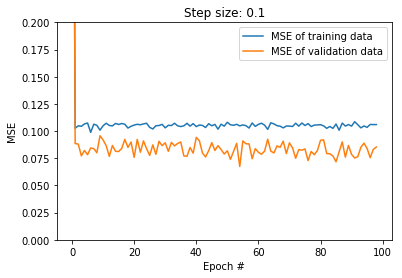

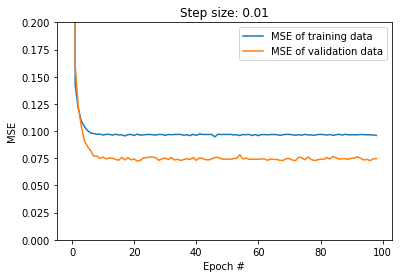

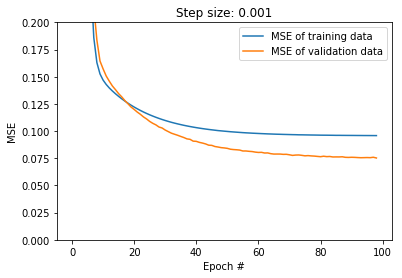

In [17]:
plt.figure(1)
MSE_valid(0.1, 1, 100)
plt.ylim(0,0.2)
plt.figure(2)
MSE_valid(0.01, 1, 100)
plt.ylim(0,0.2)
plt.figure(3)
MSE_valid(0.001, 1, 100)
plt.ylim(0,0.2)

In [18]:
# 2.(b)
y_hat_test = np.zeros(shape=(len(test2.y),1))
mse_test = 0
w0, w1 = MSE_valid(0.01, 0, 30)
for i in range(len(test2.x)):
    y_hat_test[i] = w0 + w1*test2.x[i]
    mse_test += (test2.y[i] - y_hat_test[i]) ** 2
mse_test = mse_test / len(test2.x)
print("Test MSE:", mse_test)
w0, w1

Test MSE: [0.06937589]


(array([3.57025193]), array([4.32036481]))

## 3.3

(array([3.57230437]), array([4.31463326]))

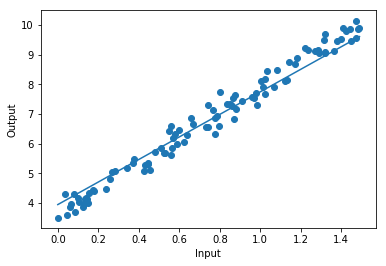

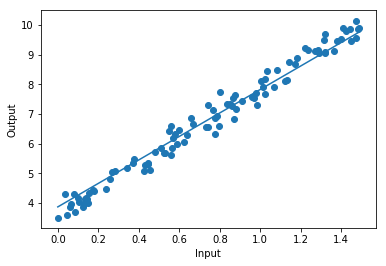

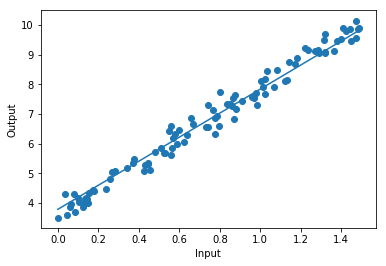

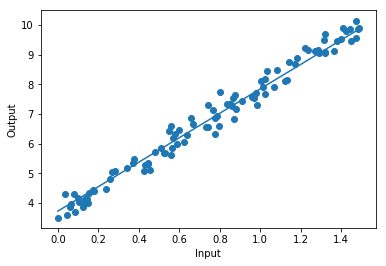

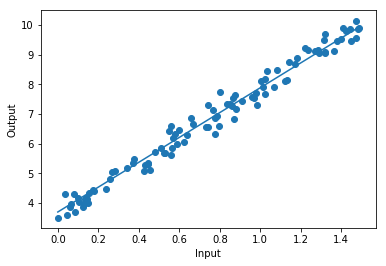

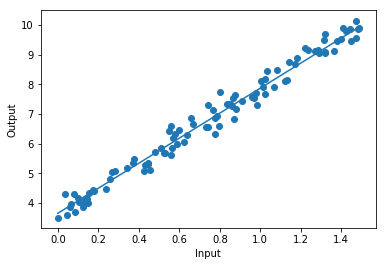

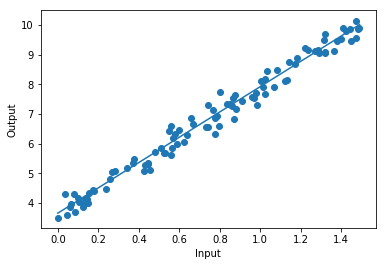

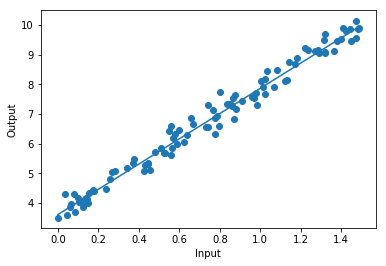

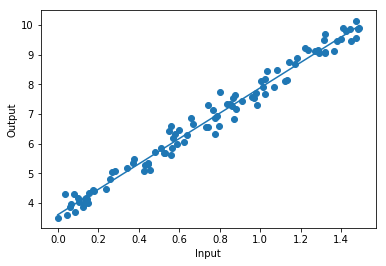

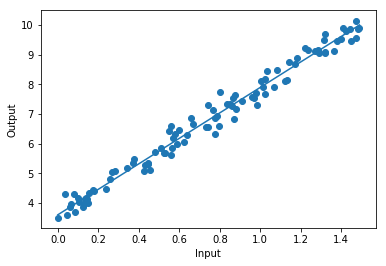

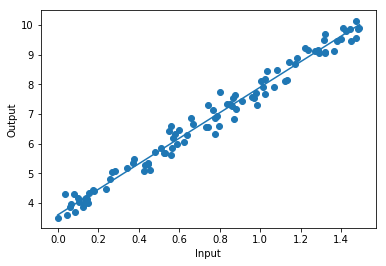

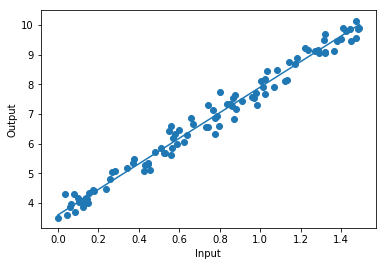

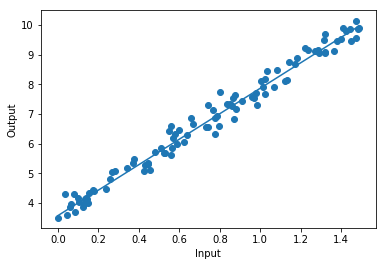

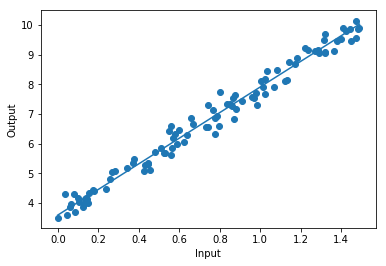

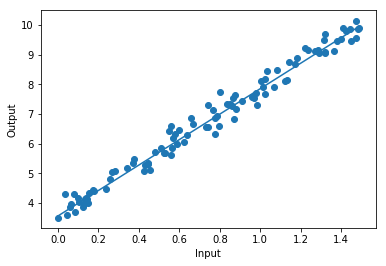

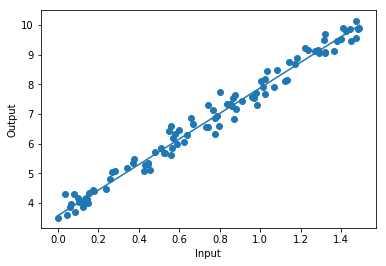

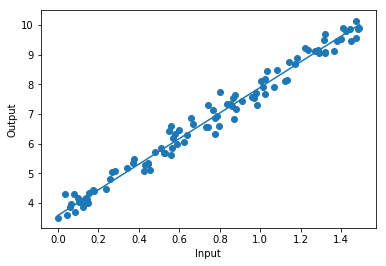

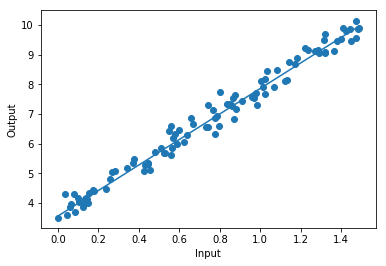

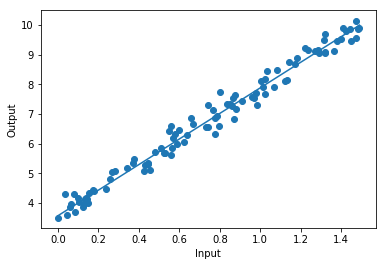

In [19]:
MSE_valid(0.01, 2, 20)

# Question 4

In [20]:
df = pd.read_csv('Datasets/communities.csv', header=None)
df.replace('?', np.NaN, inplace=True)
X = df.loc[:, 5:126]
y = df.loc[:, 127]
X = X.apply(pd.to_numeric)
X = X.values
y = y.values

## 4.1

In [21]:
# 1
inds = np.where(np.isnan(X))
col_mean = np.nanmean(X, axis=0)
X[inds] = np.take(col_mean, inds[1])
X = np.round(X, 2)
b = np.zeros((1994,123))
b[:,:-1] = X
b[:,-1] = y

In [1]:
#np.savetxt("foo.csv", X, delimiter=',', fmt='%1.3f')

## 4.2

In [23]:
# 2
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=1, shuffle=True)
idx = list(kf.split(X))
train_0 = idx[0][0]
test_0 = idx[0][1]
train_1 = idx[1][0]
test_1 = idx[1][1]
train_2 = idx[2][0]
test_2 = idx[2][1]
train_3 = idx[3][0]
test_3 = idx[3][1]
train_4 = idx[4][0]
test_4 = idx[4][1]

In [24]:
def mse(train, test):
    W = np.matmul(inv(np.matmul(X[train].transpose(),X[train])), np.matmul(X[train].transpose(), y[train]))
    Y = np.matmul(X[test], W)
    y_ = y[test]
    mse = 0
    for i in range(len(y_)):
        mse += (y_[i] - Y[i]) ** 2
    mse /= len(y_)
    #print(mse)
    #print(W)
    return mse

In [25]:
def avg_mse():
    return (mse(train_0, test_0) + mse(train_1, test_1) + mse(train_2, test_2) + mse(train_3, test_3) + mse(train_4, test_4)) / 5
avg_mse()

20.06442275321784

## 4.3

In [26]:
# 3.(a)
def mseR(train, test, a):
    I = np.identity(122)
    W = np.matmul(inv(np.add(np.matmul(X[train].transpose(), X[train]), a*I)), np.matmul(X[train].transpose(), y[train]))
    Y = np.matmul(X[test], W)
    y_ = y[test]
    mse = 0
    for i in range(len(y_)):
        mse += (y_[i] - Y[i]) ** 2
    mse /= len(y_)
    #print(W)
    #print(mse)
    if(a == 1):
        return W
    return mse

In [27]:
def avg_mseR(a):
    return (mseR(train_0, test_0, a) + mseR(train_1, test_1, a) + mseR(train_2, test_2, a) + mseR(train_3, test_3, a) + mseR(train_4, test_4, a)) / 5
avg_mseR(0.99)

0.01863915521558913

Text(0, 0.5, 'Average Test MSE')

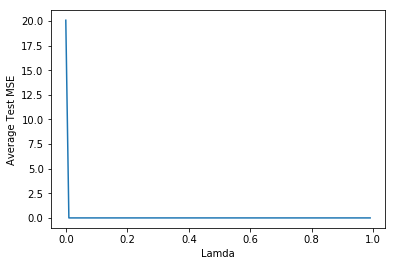

In [28]:
avg_mse = []
t = np.arange(0, 1.0, 0.01)
for a in np.arange(0.0, 1.0, 0.01):
        avg_mse.append(avg_mseR(a))
plt.plot(t, avg_mse)
plt.xlabel("Lamda")
plt.ylabel("Average Test MSE")


In [29]:
avg_mse.index(min(avg_mse))

99

In [30]:
# 3.(b)
W_avg = avg_mseR(1)
idxs = []
for i in range(len(W_avg)):
    if (abs(W_avg[i]) > 0.1):
        idxs.append(i)
X_red = X[:,idxs]

In [31]:
def mse_red(train, test):
    W = np.matmul(inv(np.matmul(X_red[train].transpose(),X_red[train])), np.matmul(X_red[train].transpose(), y[train]))
    Y = np.matmul(X_red[test], W)
    y_ = y[test]
    mse = 0
    for i in range(len(y_)):
        mse += (y_[i] - Y[i]) ** 2
    mse /= len(y_)
    print(mse)
    #print(W)
    return mse

In [32]:
# 3.(c)
def avg_mse_red():
    return (mse_red(train_0, test_0) + mse_red(train_1, test_1) + mse_red(train_2, test_2) + mse_red(train_3, test_3) + mse_red(train_4, test_4)) / 5
avg_mse_red()

0.019556242431584363
0.02090613585684893
0.015497555208649398
0.015439175760277814
0.022093975150128144


0.01869861688149773